In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [ ]:
# Preparing MNIST dataset

# Loading and scaling
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # dividing by 255 to standardise data 
#(pixel value now between 0 and 1)

# Reshaping
x_train_res = x_train.reshape(60000,784)
x_test_res = x_test.reshape(10000,784)

# One-hot encoding for neuronal networks
y_train_ohe=keras.utils.to_categorical(y_train, num_classes=10) 
y_test_ohe = keras.utils.to_categorical(y_test, num_classes=10)

# PCA Analysis on MNIST database

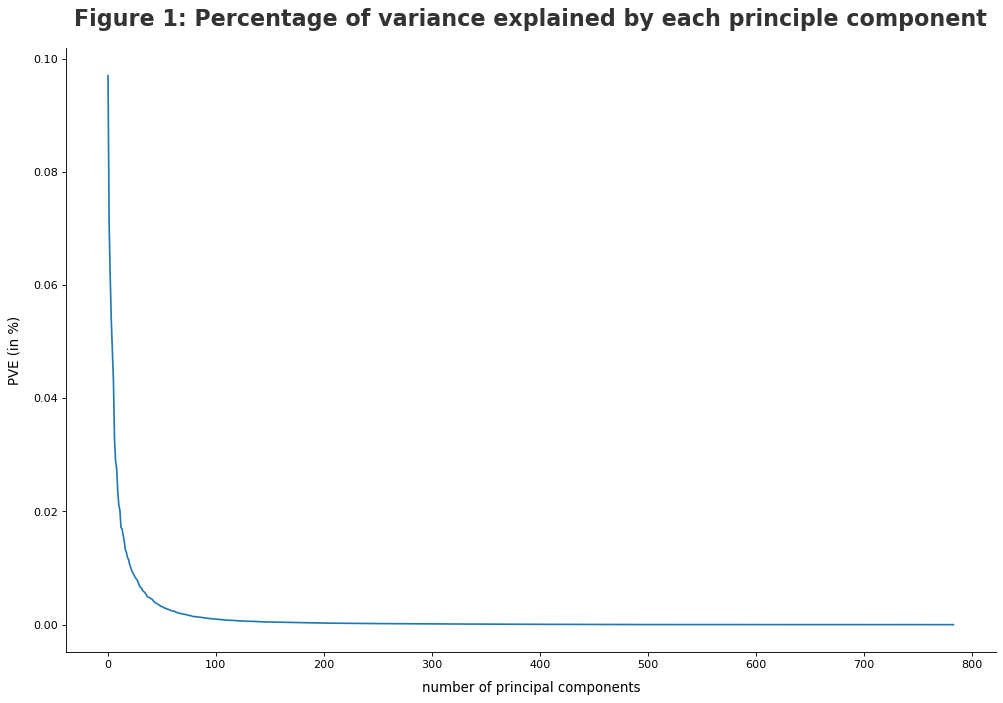

In [ ]:
# Training the PCA model for all principle components
pca_model = PCA().fit(x_train_res)

#Plotting the variance explained by each component in %
fig,ax = plt.subplots(figsize=(15,10), dpi=80)
plt.plot(pca_model.explained_variance_ratio_)
ax.set_xlabel('number of principal components', labelpad=10, fontsize=12)
ax.set_ylabel('PVE (in %)', labelpad=10, fontsize=12)
ax.set_title('Figure 1: Percentage of variance explained by each principle component', 
             pad=20, fontsize=20,color='#333333', weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('pca_variance_2a.pdf', format ='pdf')
plt.show()

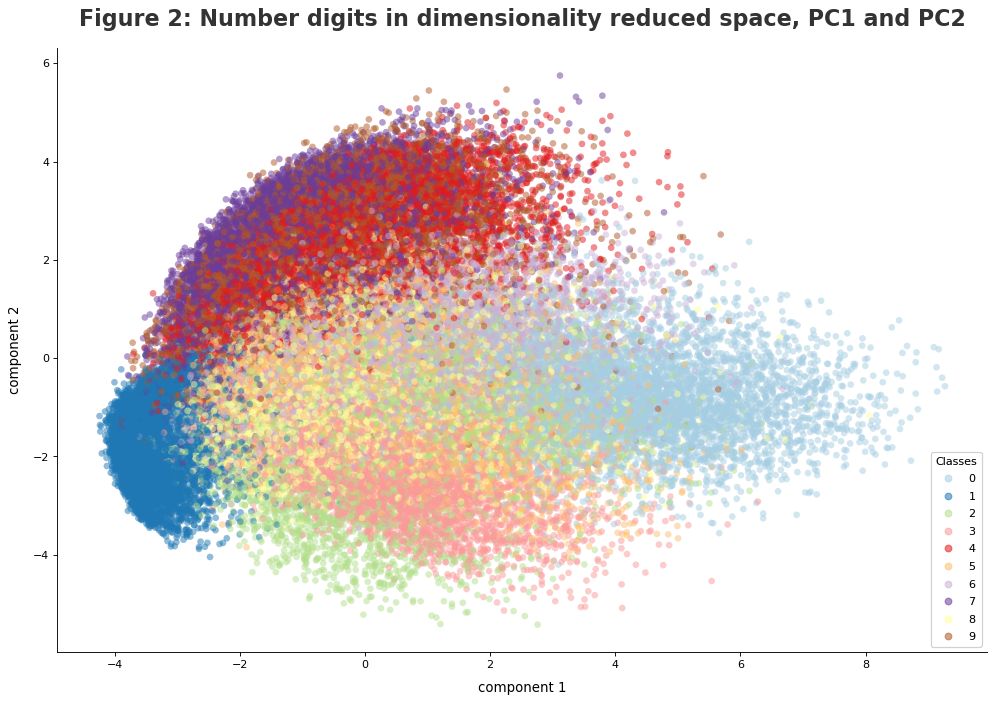

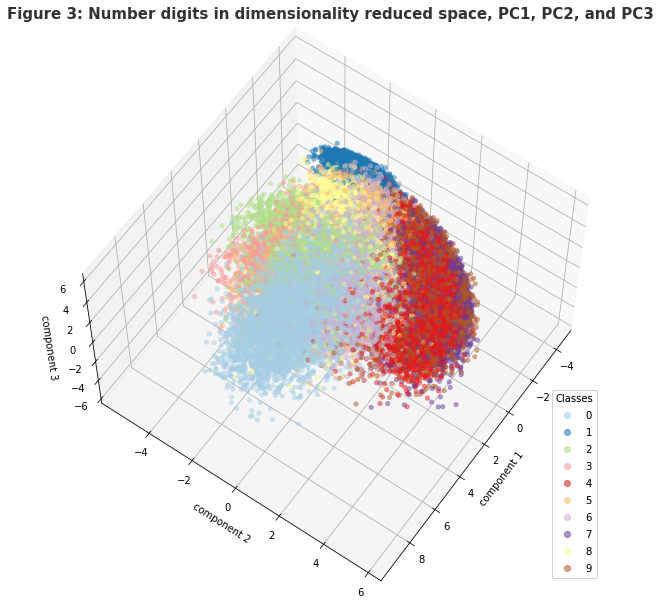

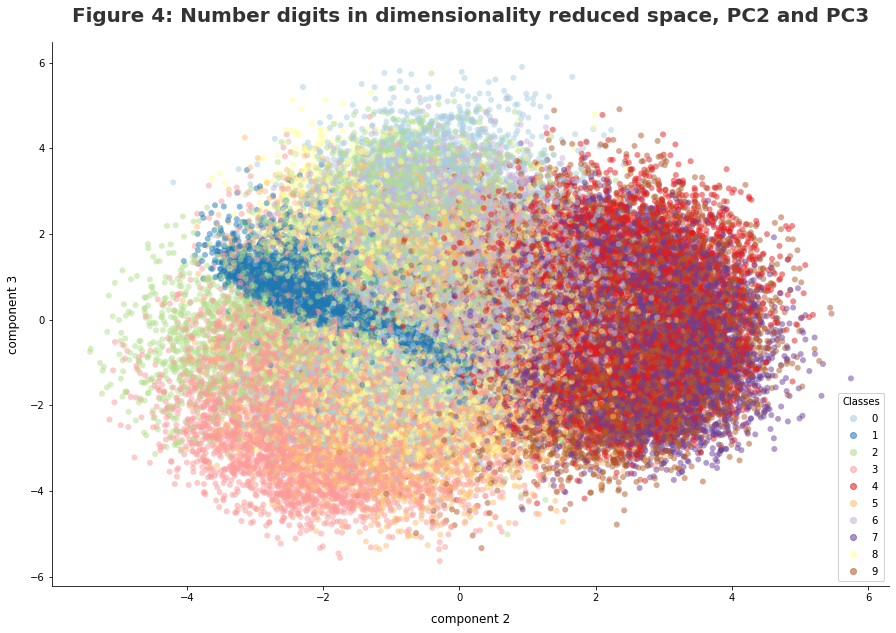

In [ ]:
# Plotting in the dimensionality reduced space
pca_reduced = PCA(n_components=3).fit(x_train_res)
X_pca = pca_reduced.transform(x_train_res)

# 2D plot PC 1 and PC 2
fig, ax = plt.subplots(figsize= (15,10), dpi=80)

scatter = ax.scatter(X_pca[:,0], X_pca[:,1], c= y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Paired', 10))
ax.set_xlabel('component 1', labelpad=10, fontsize=12)
ax.set_ylabel('component 2', labelpad=10, fontsize=12)
ax.set_title('Figure 2: Number digits in dimensionality reduced space, PC1 and PC2',
             pad=20, fontsize=20, color='#333333', weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
legend1 = ax.legend(*scatter.legend_elements(), loc = 'lower right', title=('Classes'))
ax.add_artist(legend1)
plt.savefig('pca_2Dplot_2a.pdf', format ='pdf')
plt.show()

# 3D plot
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.view_init(60, 35) #change angle of view
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_train,
           cmap=plt.cm.get_cmap('Paired', 10), linewidth=0.5, alpha=0.5)
ax.set_xlabel('component 1', fontsize=10, rotation=150)
ax.set_ylabel('component 2', fontsize=10,)
ax.set_zlabel(r'component 3', fontsize=10, rotation=60)
ax.set_title('Figure 3: Number digits in dimensionality reduced space, PC1, PC2, and PC3',
             pad=20, fontsize=15, color='#333333', weight='bold')
legend1 = ax.legend(*scatter.legend_elements(), loc = 'lower right', title=('Classes'))
ax.add_artist(legend1)
plt.savefig('pca_3Dplot_2a.pdf', format ='pdf')
plt.show()

# 2D plot PC 2 and PC 3
fig, ax = plt.subplots(figsize= (15,10))

scatter = ax.scatter(X_pca[:,1], X_pca[:,2], c= y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Paired', 10))
ax.set_xlabel('component 2', labelpad=10, fontsize=12)
ax.set_ylabel('component 3', labelpad=10, fontsize=12)
ax.set_title('Figure 4: Number digits in dimensionality reduced space, PC2 and PC3',
             pad=20, fontsize=20, color='#333333', weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
legend1 = ax.legend(*scatter.legend_elements(), loc = 'lower right', title=('Classes'))
ax.add_artist(legend1)
plt.savefig('pca_2D_pc3_plot_2a.pdf', format ='pdf')
plt.show()

# Comparing PCA and Lasso Regression
Simulations

In [ ]:
test_errors_pca = []
test_errors_lasso = []

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

for i in range(1000):
    np.random.seed(i)

    # Creating 20 correlated random variables with 500 observations each
    means = np.random.randint(1,30, size=20)
    cov_matrix = np.random.rand(20,20)
    np.fill_diagonal(cov_matrix, 1, wrap=False)
    X = np.random.multivariate_normal(means, cov_matrix, (500))

    # Creating 2 random variables which are uncorrelated with any other variable
    # and from standard normal distribution
    vars_uncorrel = np.random.normal(0, 1,(500,2))

    # Creating epsilon values
    epsilon = np.random.normal(0,1,(500,1))

    # Combining all variables in one matrix
    X_final = np.concatenate((X, vars_uncorrel, epsilon), axis = 1)

    # Creating a dataframe
    column_names = []
    for i in range(1,23):
        column_names.append('X'+str(i))
    column_names.append('epsilon')

    df_sim = pd.DataFrame(data = X_final, columns = column_names)

    # Train/Test split
    mask_sim = np.random.rand(len(df_sim)) < 0.667
    train_sim = df_sim[mask_sim]
    test_sim = df_sim[~mask_sim]

    # Normalising
    ss = preprocessing.StandardScaler()
    train_sim_norm = pd.DataFrame(data = ss.fit_transform(train_sim), columns = column_names)
    test_sim_norm = pd.DataFrame(data = ss.fit_transform(test_sim), columns = column_names)

    # Creating y values
    train_sim_norm['y'] = 0.5 + train_sim_norm['X9'].apply(lambda x: x*0.1) \
                            + train_sim_norm['X13'].apply(lambda x: x*0.05) \
                            + train_sim_norm['X21'].apply(lambda x: x*1.7) \
                            + train_sim_norm['X22'].apply(lambda x: x*2.2) \
                            + train_sim_norm['epsilon'].apply(lambda x: x*0.1)
    test_sim_norm['y'] = 0.5 + test_sim_norm['X9'].apply(lambda x: x*0.1) \
                            + test_sim_norm['X13'].apply(lambda x: x*0.05) \
                            + test_sim_norm['X21'].apply(lambda x: x*1.7) \
                            + test_sim_norm['X22'].apply(lambda x: x*2.2) \
                            + test_sim_norm['epsilon'].apply(lambda x: x*0.1)

    # Creating x and y matrices for training and test sets
    x_train_sim = train_sim_norm.iloc[:, :-2]
    y_train_sim = train_sim_norm.iloc[:, -1]
    x_test_sim = test_sim_norm.iloc[:, :-2]
    y_test_sim = test_sim_norm.iloc[:, -1]

    # PCA with only two PCs
    pca_sim_2 = PCA(n_components=2).fit(x_train_sim)
    X_transformed = pca_sim_2.transform(x_train_sim)
    X_test_transformed = pca_sim_2.transform(x_test_sim)

    # Linear regression model based on first two PCs
    reg_model = LinearRegression().fit(X_transformed, y_train_sim)

    # Lasso regression
    # Idea: increase alpha until the point where only two parameters are abover or below 0
    alphas = 0.01
    counter = 0
    coefs_not_null = 10

    while coefs_not_null > 2:
        model_lasso = Lasso(alpha=alphas).fit(x_train_sim, y_train_sim)
        coefs = model_lasso.coef_
        coefs_not_null = np.count_nonzero(coefs)
        alphas += 0.001
        counter +=1

    # Comparison of test errors between the models
    test_error_pca_sim = mean_squared_error(reg_model.predict(X_test_transformed), y_test_sim)
    test_error_lasso_sim = mean_squared_error(model_lasso.predict(x_test_sim), y_test_sim)
    test_errors_pca.append(test_error_pca_sim)
    test_errors_lasso.append(test_error_lasso_sim)

In [ ]:
# Comparison of mean test errors between the models
print('Mean test error PCA = {:.2f}'.format(np.array(test_errors_pca).mean()))
print('Mean test error LASSO = {:.2f}'.format(np.array(test_errors_lasso).mean()))

Mean test error PCA = 7.71
Mean test error LASSO = 0.05


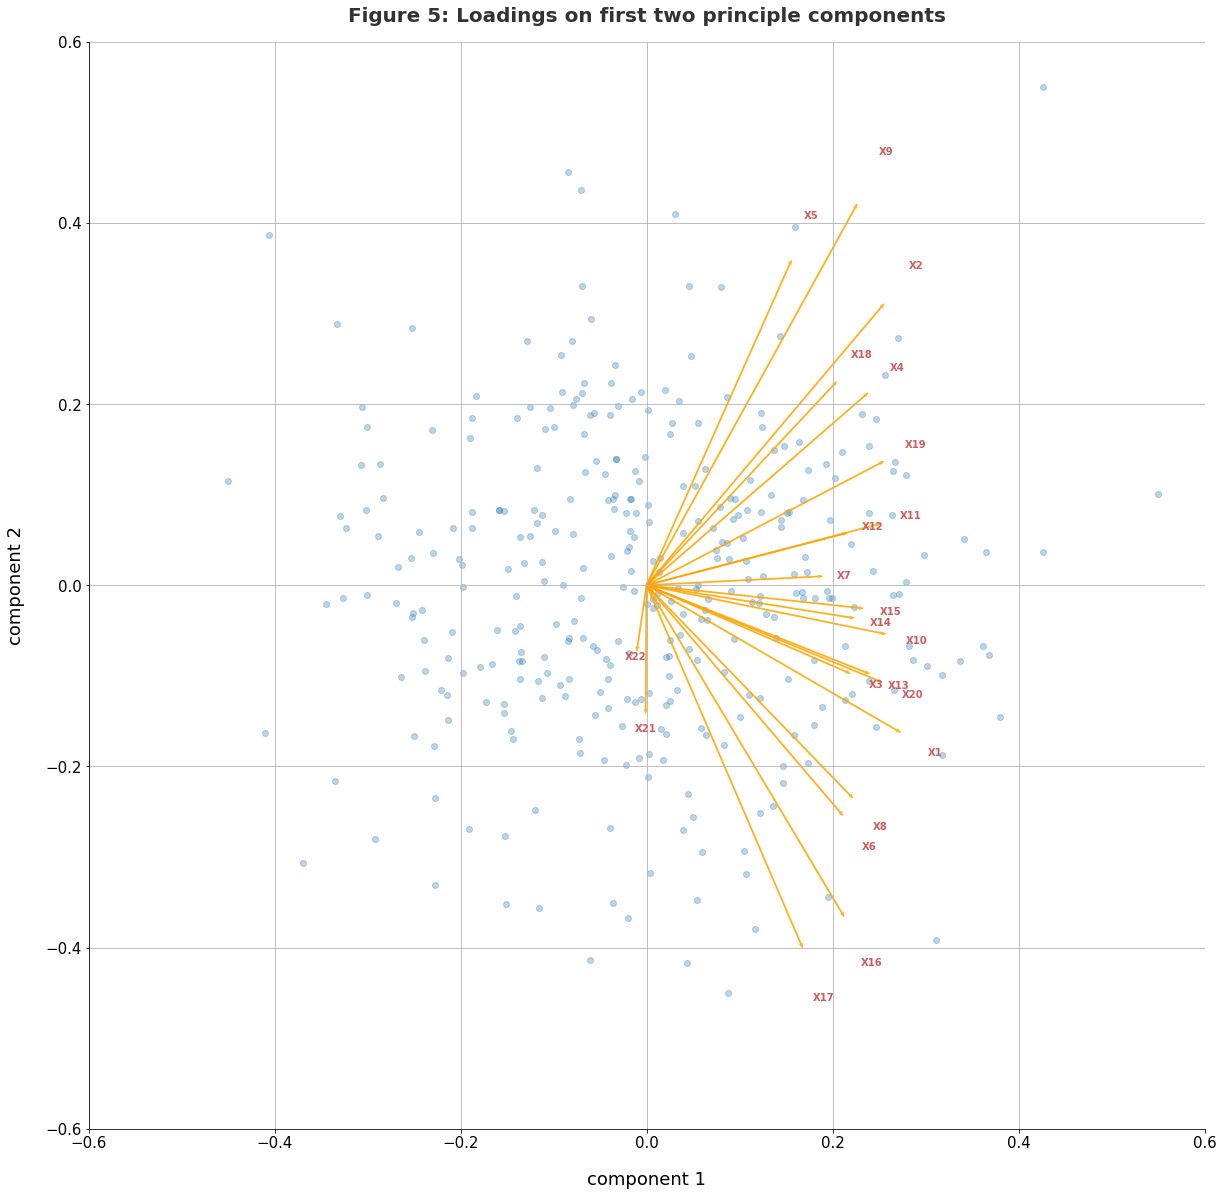

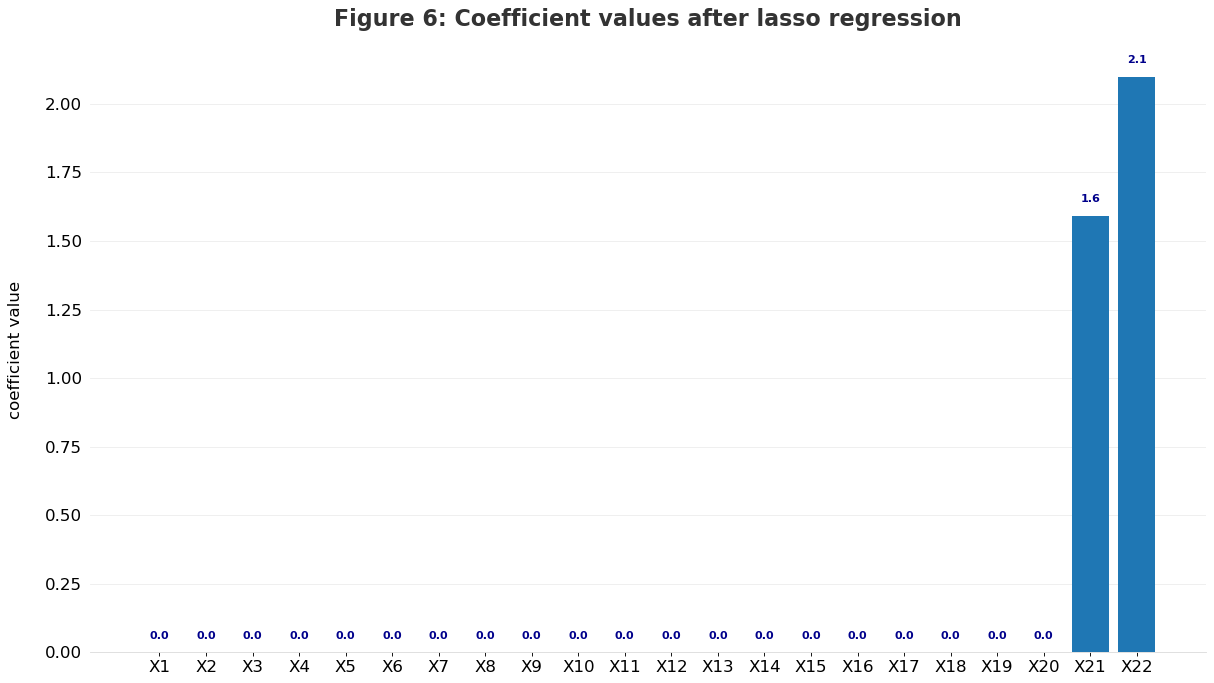

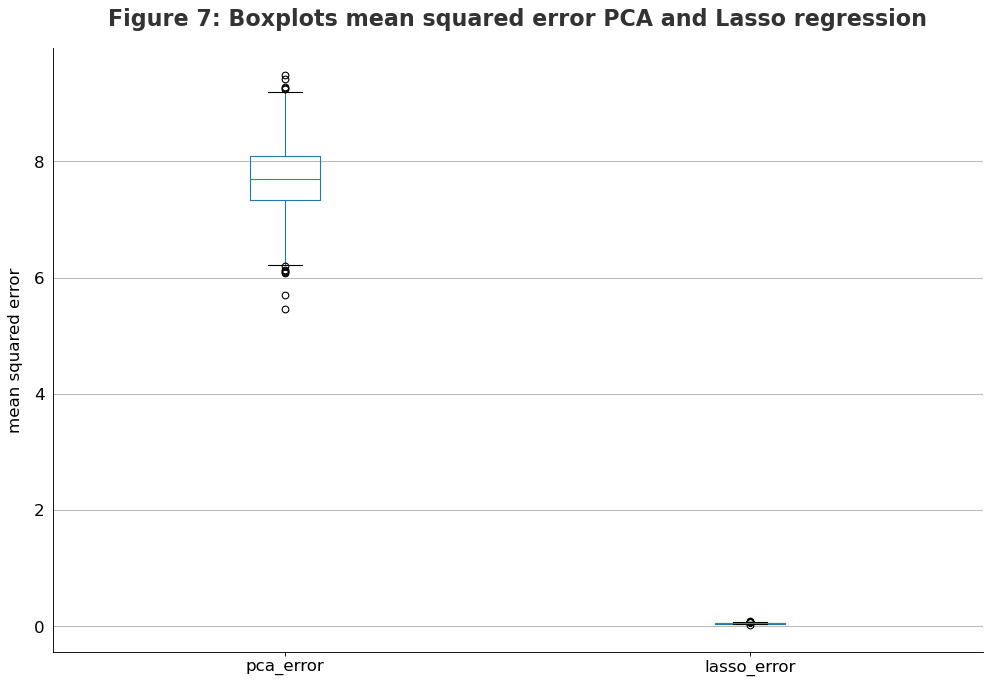

In [ ]:
# FIGURES

# Plot which shows importance of vars in PC1 and PC2
fig, ax = plt.subplots(figsize=(20,20))

def PCA_biplot(x_pca_score,coeff,labels=None):
    xs = x_pca_score[:,0]
    ys = x_pca_score[:,1]
    n = coeff.shape[0]
    x_scale = 1.0/(xs.max() - xs.min())
    y_scale = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * x_scale,ys * y_scale, alpha = 0.3)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'orange',alpha = 0.7)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, column_names[i], color = 'indianred',
                 ha = 'center', va = 'center', weight='bold', fontsize = 'medium')
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)
ax.set_xlabel('component 1', labelpad=20, fontsize=18)
ax.set_ylabel('component 2', labelpad=20, fontsize=18)
#plt.xlabel("PC{}".format(1))
#plt.ylabel("PC{}".format(2))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Figure 5: Loadings on first two principle components', pad=20, fontsize=20,
             color='#333333', weight='bold')
ax.tick_params(bottom=True, left=True, labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid()

PCA_biplot(X_transformed[:,0:2],np.transpose(pca_sim_2.components_[0:2, :]))
plt.savefig('loadings.pdf', format ='pdf')
plt.show()

# Plot for coefficient values in Lasso
fig,ax = plt.subplots(figsize=(18,10), dpi=80)

bar_chart = ax.bar(column_names[:-1], height = model_lasso.coef_)

# Axes formatting and labelling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=True, left=False, labelsize=15)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_ylabel('coefficient value', labelpad=20, fontsize=15)
ax.set_title('Figure 6: Coefficient values after lasso regression', pad=20, fontsize=20,
             color='#333333', weight='bold')

for bar in bar_chart:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.05,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color='darkblue',
      weight='bold')

plt.savefig('lasso_2b.pdf', format ='pdf')
plt.show()

# Boxplots of errors
df_errors = pd.DataFrame({'pca_error': np.array(test_errors_pca), 
                          'lasso_error': np.array(test_errors_lasso)})
fig, ax = plt.subplots(figsize=(15,10), dpi=80)
df_errors.boxplot()
ax.set_ylabel('mean squared error', labelpad=10, fontsize=15)
ax.tick_params(bottom = True, left= False, axis='both', which='major', labelsize=15)
ax.set_title('Figure 7: Boxplots mean squared error PCA and Lasso regression', 
             pad=20, fontsize=20,color='#333333', weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(False)
plt.savefig('boxplots.pdf', format ='pdf')
plt.show()